In [1]:
# Importing libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading data cleaned

data = pd.read_csv('cleaned_data.csv')

In [3]:
data.head()

,distance,consume,speed,temp_inside,temp_outside,ac,rain,sun,gas_type,fuel_efficiency_rate,fuel_efficiency_speed,temperature_difference,estimated_fuel_used,cost_trip
0,28.0,5.0,26,21.5,12,0,0,0,E10,5.60,0.19,9.5,1.40,1.93
1,12.0,4.2,30,21.5,13,0,0,0,E10,2.86,0.14,8.5,0.50,0.69
2,11.2,5.5,38,21.5,15,0,0,0,E10,2.04,0.14,6.5,0.62,0.86
3,12.9,3.9,36,21.5,14,0,0,0,E10,3.31,0.11,7.5,0.50,0.69
4,18.5,4.5,46,21.5,15,0,0,0,E10,4.11,0.10,6.5,0.83,1.15


In [4]:
# Numerical to check correlations

numerical = data.select_dtypes(np.number)

<function matplotlib.pyplot.show(close=None, block=None)>

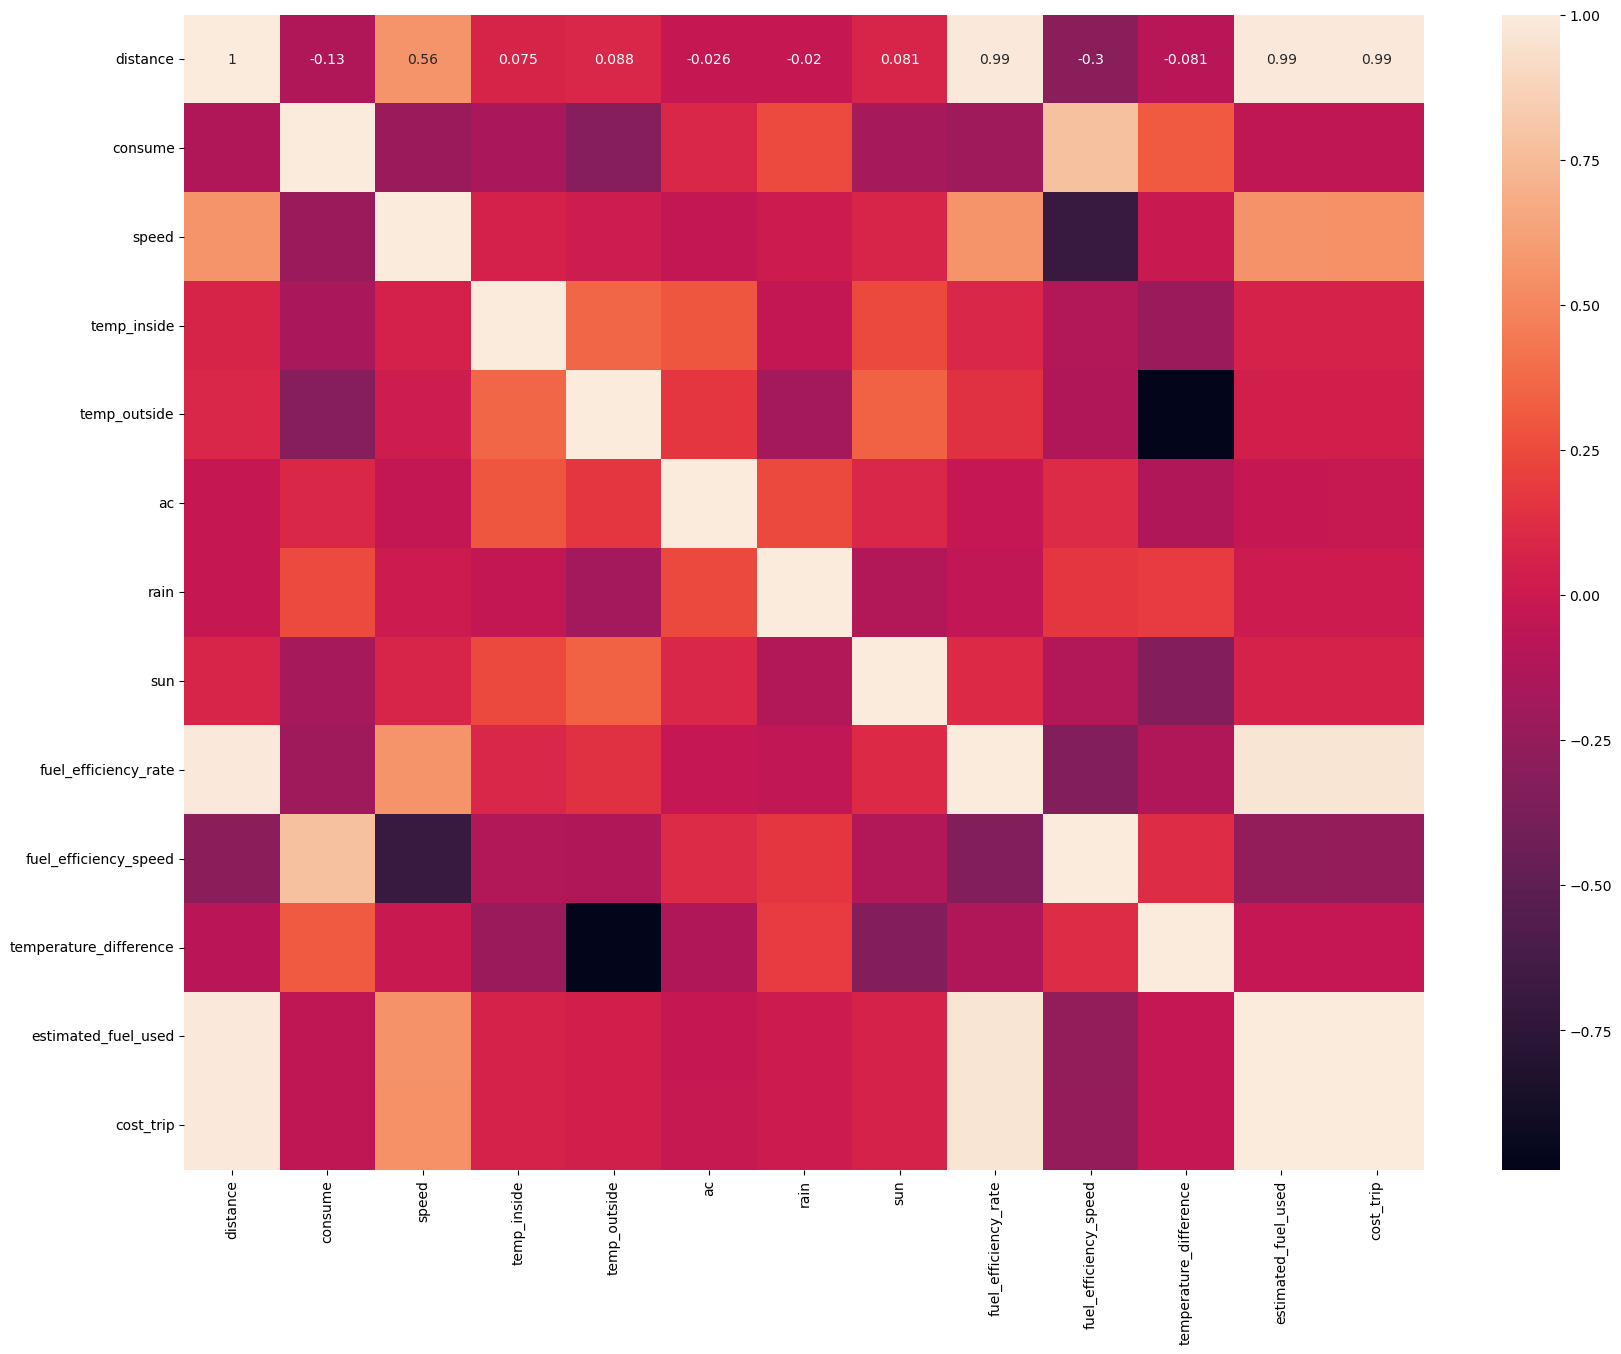

In [5]:
# Checking for correlations

corr_matrix = numerical.corr(method = 'pearson')

fig, ax = plt.subplots(figsize=(20, 15))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show

In [6]:
corr_matrix

,distance,consume,speed,temp_inside,temp_outside,ac,rain,sun,fuel_efficiency_rate,fuel_efficiency_speed,temperature_difference,estimated_fuel_used,cost_trip
distance,1.000000,-0.128967,0.562299,0.074734,0.088175,-0.025738,-0.019791,0.081120,0.991598,-0.299154,-0.080936,0.992094,0.990743
consume,-0.128967,1.000000,-0.227866,-0.161470,-0.320811,0.096591,0.248118,-0.170667,-0.201910,0.774850,0.310871,-0.052082,-0.051657
speed,0.562299,-0.227866,1.000000,0.059139,0.015411,-0.035408,0.009489,0.081618,0.561559,-0.693218,-0.007303,0.551754,0.546166
temp_inside,0.074734,-0.161470,0.059139,1.000000,0.359649,0.296719,-0.037204,0.242237,0.087251,-0.118628,-0.226884,0.061778,0.061192
temp_outside,0.088175,-0.320811,0.015411,0.359649,1.000000,0.167562,-0.186315,0.346903,0.140703,-0.132350,-0.990353,0.037826,0.040188
ac,-0.025738,0.096591,-0.035408,0.296719,0.167562,1.000000,0.242915,0.088598,-0.031761,0.110408,-0.130831,-0.018647,-0.017318
rain,-0.019791,0.248118,0.009489,-0.037204,-0.186315,0.242915,1.000000,-0.112650,-0.048132,0.166237,0.188944,0.009017,0.011470
sun,0.081120,-0.170667,0.081618,0.242237,0.346903,0.088598,-0.112650,1.000000,0.099221,-0.112555,-0.326112,0.064105,0.065587
fuel_efficiency_rate,0.991598,-0.201910,0.561559,0.087251,0.140703,-0.031761,-0.048132,0.099221,1.000000,-0.336336,-0.133903,0.967694,0.965736
fuel_efficiency_speed,-0.299154,0.774850,-0.693218,-0.118628,-0.132350,0.110408,0.166237,-0.112555,-0.336336,1.000000,0.120525,-0.253836,-0.250870


In [7]:
# Looking at those higher than 0.90

threshold = 0.90

high_correlations = corr_matrix[
    (np.abs(corr_matrix) >= threshold) & (np.abs(corr_matrix) < 1)
]

high_correlation_df = pd.DataFrame(high_correlations.stack().reset_index())
high_correlation_df.columns = ['Variable 1', 'Variable 2', 'Correlation']
high_correlation_df = high_correlation_df[high_correlation_df['Correlation'] != 1.0]


high_correlation_df

,Variable 1,Variable 2,Correlation
0,distance,fuel_efficiency_rate,0.991598
1,distance,estimated_fuel_used,0.992094
2,distance,cost_trip,0.990743
3,temp_outside,temperature_difference,-0.990353
4,fuel_efficiency_rate,distance,0.991598
5,fuel_efficiency_rate,estimated_fuel_used,0.967694
6,fuel_efficiency_rate,cost_trip,0.965736
7,temperature_difference,temp_outside,-0.990353
8,estimated_fuel_used,distance,0.992094
9,estimated_fuel_used,fuel_efficiency_rate,0.967694


In [8]:
# There is high correlation with the ones we created. Let's drop them:

cols_drop = ['fuel_efficiency_rate','fuel_efficiency_speed','temperature_difference','estimated_fuel_used','cost_trip']

In [9]:
data = data.drop (cols_drop, axis = 1)

data.head()

,distance,consume,speed,temp_inside,temp_outside,ac,rain,sun,gas_type
0,28.0,5.0,26,21.5,12,0,0,0,E10
1,12.0,4.2,30,21.5,13,0,0,0,E10
2,11.2,5.5,38,21.5,15,0,0,0,E10
3,12.9,3.9,36,21.5,14,0,0,0,E10
4,18.5,4.5,46,21.5,15,0,0,0,E10


In [10]:
# Processing data

In [11]:
# Split X/y

X = data.drop('consume', axis=1)
y = data['consume']

In [12]:
# Train/test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('X_train =', X_train.shape)
print('y_train =', y_train.shape)
print('X_test =', X_test.shape)
print('y_test =', y_test.shape)

X_train = (310, 8)
y_train = (310,)
X_test = (78, 8)
y_test = (78,)


In [13]:
# Defining variables:

X_train_num = X_train.select_dtypes(include = np.number)
X_train_cat = X_train.select_dtypes(include = object)

display(X_train_num)
display(X_train_cat)

,distance,speed,temp_inside,temp_outside,ac,rain,sun
63,6.8,26,21.5,6,0,0,0
238,11.8,40,22.5,2,0,0,0
132,16.1,33,21.5,6,0,0,0
101,26.2,71,21.0,8,1,1,0
351,16.0,46,22.0,17,0,0,0
...,...,...,...,...,...,...,...
71,2.0,20,21.5,10,0,0,0
106,162.7,75,23.0,1,0,0,0
270,16.0,41,22.0,12,0,0,0
348,16.6,50,22.0,25,0,0,0


,gas_type
63,SP98
238,E10
132,SP98
101,SP98
351,SP98
...,...
71,SP98
106,SP98
270,E10
348,E10


In [14]:
X_test_num = X_test.select_dtypes(include = np.number)
X_test_cat = X_test.select_dtypes(include = object)

display(X_test_num)
display(X_test_cat)

,distance,speed,temp_inside,temp_outside,ac,rain,sun
271,4.2,32,22.0,18,0,0,0
46,14.2,32,21.5,7,0,0,0
167,12.3,40,21.5,6,0,0,0
42,11.7,37,21.5,6,0,0,0
349,18.3,46,22.0,16,0,0,0
...,...,...,...,...,...,...,...
3,12.9,36,21.5,14,0,0,0
18,25.9,39,21.5,8,0,0,0
93,12.4,43,22.0,10,0,0,0
108,11.8,36,21.0,4,0,0,0


,gas_type
271,E10
46,SP98
167,E10
42,E10
349,SP98
...,...
3,E10
18,E10
93,SP98
108,SP98


In [15]:
# Scaling

# On Train and Test:

transformer = StandardScaler().fit(X_train_num)
numericals_train_standardized = transformer.transform(X_train_num)
numericals_test_standardized = transformer.transform(X_test_num)

In [16]:
# Encoding

# On Train and Test:

encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(X_train_cat)
categoricals_train_encoded = encoder.transform(X_train_cat).toarray()
categoricals_test_encoded = encoder.transform(X_test_cat).toarray()

In [17]:
# Concatenate the scaled and encoded ones with np because they are arrays:

X_train = np.concatenate([numericals_train_standardized,categoricals_train_encoded], axis = 1)
X_test = np.concatenate([numericals_test_standardized,categoricals_test_encoded], axis = 1)

In [18]:
# Linear Regression

lm = LinearRegression()

In [19]:
lm.fit(X_train, y_train)

LinearRegression()

In [20]:
prediction = lm.predict(X_test)
prediction

array([4.74733952, 5.18519533, 5.10691667, 5.16698112, 4.52003882,
       6.11427183, 5.87492158, 5.14598985, 5.80212292, 4.87720768,
       4.07619551, 4.74330773, 6.58381302, 4.54089207, 5.0618092 ,
       5.18129809, 5.49277553, 5.06885871, 5.39244095, 5.24256984,
       4.29987871, 5.28191939, 4.92570398, 5.15138626, 4.83383097,
       4.77965089, 4.37982541, 4.26457107, 5.06652288, 4.14976526,
       4.91394767, 5.20673401, 4.70619993, 4.56352389, 5.40770428,
       5.00300861, 4.64817209, 4.21428812, 5.07025087, 6.02491616,
       4.48535751, 5.23459829, 5.32049092, 4.44240225, 4.69789576,
       4.37939294, 5.01769352, 5.30471275, 4.90386632, 4.97026245,
       4.80362623, 5.34243139, 5.36684887, 5.19169943, 4.65124065,
       4.87800444, 6.73182904, 5.28178376, 4.70149166, 4.7335188 ,
       5.41016329, 4.82930441, 4.53220329, 4.74984825, 4.3852194 ,
       4.74299108, 5.47500314, 4.326811  , 4.97487929, 4.93784186,
       4.27863614, 4.68045927, 5.14563163, 4.90875594, 5.10673

In [21]:
y_test

271    5.6
46     5.1
167    6.1
42     4.6
349    4.3
      ... 
3      3.9
18     4.9
93     4.7
108    4.7
255    4.4
Name: consume, Length: 78, dtype: float64

In [22]:
mse = mean_squared_error(y_test, prediction)
rmse = np.sqrt(mean_squared_error(y_test,prediction))
mae = mean_absolute_error(y_test, prediction)
r2 = r2_score(y_test, prediction)


print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)

MSE: 0.8219075821875489
RMSE: 0.9065911880156066
MAE: 0.6598027559858755
R2: 0.09412310938686319


In [23]:
# Not good... Let's try with other regression models:

def train_evaluate_models(models, X_train, y_train, X_test, y_test):
    
    results={}
    
    for model in models:
        
        model_name=model.__class__.__name__
        model.fit(X_train, y_train)
        prediction=model.predict(X_test)
        prediction_train = model.predict(X_train)
        
        metrics = {} 
        
        mse = mean_squared_error(y_test, prediction)
        mae = mean_absolute_error(y_test, prediction)
        r2_test = r2_score(y_test, prediction)
        r2_train = r2_score(y_train, prediction_train)
        metrics['MSE'] = mse
        metrics['MAE'] = mae
        metrics['R2_test'] = r2_test
        metrics['R2_train'] = r2_train

        results[model_name] = metrics

    return results

In [24]:
models = [LinearRegression(), KNeighborsRegressor(), DecisionTreeRegressor(), RandomForestRegressor(), MLPRegressor()]

In [25]:
train_evaluate_models(models, X_train, y_train, X_test, y_test)

{'LinearRegression': {'MSE': 0.8219075821875489,
  'MAE': 0.6598027559858755,
  'R2_test': 0.09412310938686319,
  'R2_train': 0.22282219423945993},
 'KNeighborsRegressor': {'MSE': 0.7697282051282053,
  'MAE': 0.5941025641025641,
  'R2_test': 0.15163333665455947,
  'R2_train': 0.49251771803457167},
 'DecisionTreeRegressor': {'MSE': 1.0183653846153846,
  'MAE': 0.569871794871795,
  'R2_test': -0.12240559415222663,
  'R2_train': 0.9995763862324677},
 'RandomForestRegressor': {'MSE': 0.4058127306054142,
  'MAE': 0.42801880341880416,
  'R2_test': 0.5527278461239773,
  'R2_train': 0.9343254761979295},
 'MLPRegressor': {'MSE': 0.8819132193313499,
  'MAE': 0.7315531640413984,
  'R2_test': 0.027987060549826248,
  'R2_train': 0.3722429787549597}}

In [26]:
# RandomForestRegressor has the best score.